In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#### 讀取整個目錄的文件：

In [3]:
files = [file for file in os.listdir('data/Sales_Data')]

In [4]:
all_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('data/Sales_Data/'+file)
    all_data = pd.concat([all_data, df])
all_data.to_csv('data/all_data.csv', index=False)

In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [6]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  186305 non-null  object        
 3   Price Each        186305 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 10.0+ MB


In [8]:
all_data = all_data.dropna()

In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


In [10]:
#all_data['Year'] = all_data['Order Date'].dt.year

In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 13621
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Year              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 11.3+ MB


In [13]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 13621
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Year              185950 non-null  int64         
 7   Sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 12.8+ MB


In [15]:
all_data['Month'] = all_data['Order Date'].dt.month

In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 13621
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Year              185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   Month             185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 14.2+ MB


#### **What was the best month for sales**

In [17]:
result = all_data.groupby('Month').sum().reset_index()

In [18]:
result

,Month,Quantity Ordered,Price Each,Year,Sales
0,1,10903,1.811768e+06,19602505,1.822257e+06
1,2,13449,2.188885e+06,24177525,2.202022e+06
2,3,17005,2.791208e+06,30593907,2.807100e+06
3,4,20558,3.367671e+06,36905301,3.390670e+06
4,5,18667,3.135125e+06,33446754,3.152607e+06
5,6,15253,2.562026e+06,27365526,2.577802e+06
6,7,16072,2.632540e+06,28857567,2.647776e+06
7,8,13448,2.230345e+06,24149259,2.244468e+06
8,9,13109,2.084992e+06,23462799,2.097560e+06
9,10,22703,3.715555e+06,40949358,3.736727e+06


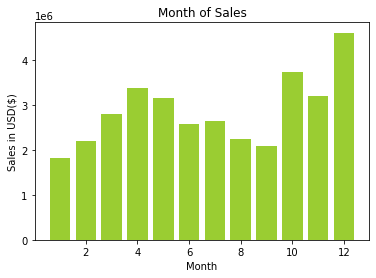

In [19]:
fig, ax = plt.subplots()
_ = ax.bar(result['Month'], result['Sales'],color='yellowgreen')
_ = ax.set_title('Month of Sales')
_ = ax.set_ylabel('Sales in USD($)')
_ = ax.set_xlabel('Month')

##### Add City Column

In [20]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [21]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 13621
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Year              185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   Month             185950 non-null  int64         
 9   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 15.6+ MB


In [22]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Sales,Month,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019,1700.00,12,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019,600.00,12,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019,11.95,12,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019,149.99,12,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019,11.95,12,Atlanta


In [23]:
city_mount = all_data.groupby('City').sum().reset_index()

In [24]:
city_mount

,City,Quantity Ordered,Price Each,Year,Sales,Month
0,Atlanta,16602,2.779908e+06,30044739,2.795499e+06,104794
1,Austin,11153,1.809874e+06,19998197,1.819582e+06,69829
2,Boston,22528,3.637410e+06,40246750,3.661642e+06,141112
3,Dallas,16730,2.752628e+06,29921582,2.767975e+06,104620
4,Los Angeles,33289,5.421435e+06,59772496,5.452571e+06,208325
5,New York City,27932,4.635371e+06,50224654,4.664317e+06,175741
6,Portland,14053,2.307747e+06,25166837,2.320491e+06,87765
7,San Francisco,50239,8.211462e+06,90313920,8.262204e+06,315520
8,Seattle,16553,2.733296e+06,29743909,2.747755e+06,104941


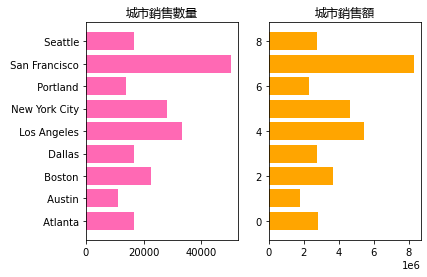

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
_ = ax1.barh(city_mount['City'], city_mount['Quantity Ordered'],color='hotpink')
_ = ax1.set_title('城市銷售數量', fontdict={'fontname':'Microsoft YaHei'})
_ = ax2.barh(city_mount.index, city_mount['Sales'], color='orange')
_ = ax2.set_title('城市銷售額', fontdict={'fontname':'Microsoft YaHei'})

#### Which Hour

In [26]:
all_data['Hour'] = all_data['Order Date'].dt.hour

In [27]:
all_data['Minute'] = all_data['Order Date'].dt.minute

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 13621
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Year              185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   Month             185950 non-null  int64         
 9   City              185950 non-null  object        
 10  Hour              185950 non-null  int64         
 11  Minute            185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 18.4+ MB


In [29]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Sales,Month,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019,1700.00,12,New York City,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019,600.00,12,New York City,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019,11.95,12,New York City,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019,149.99,12,San Francisco,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019,11.95,12,Atlanta,12,38


In [33]:
hour_sum = all_data.groupby('Hour').sum()
hour_sum

,Quantity Ordered,Price Each,Year,Sales,Month,Minute
Hour,,,,,,
0,4428,709296.70,7894302,713721.27,27554,103596
1,2619,458490.00,4744659,460866.88,16657,61807
2,1398,233833.64,2509621,234851.44,8507,32508
3,928,144726.42,1677792,145757.89,5904,23044
4,937,162058.18,1724230,162661.01,6148,26876
5,1493,229621.21,2667101,230679.82,9301,42877
6,2810,445000.11,5011158,448113.00,17539,80343
7,4556,740568.11,8098209,744854.12,28850,127447
8,7002,1185970.62,12630864,1192348.97,43626,198135


In [116]:
hour_count = all_data.groupby('Hour').count()['Order ID']

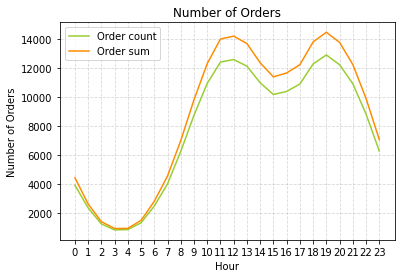

In [115]:
fig, ax = plt.subplots()
_ = ax.plot(hour_count, color='yellowgreen', label='Order count')
_ = ax.plot(hour_sum['Quantity Ordered'], color='darkorange',label='Order sum')
_ = ax.set_xticks(hour_sum.index)
_ = ax.set_title('Number of Orders')
_ = ax.set_xlabel('Hour')
_ = ax.set_ylabel('Number of Orders')
_ = ax.grid(ls='--', alpha=.5)
_ = ax.legend()

#### What products are most often sold together?

In [45]:
sold_together = all_data.loc[all_data['Order ID'].duplicated(keep=False)]

In [47]:
sold_together['Grouped'] = sold_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-47-78251eb962df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold_together['Grouped'] = sold_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [49]:
sold_together = sold_together[['Order ID', 'Grouped']].drop_duplicates()

In [81]:
sold_together_sort = sold_together.groupby('Grouped').count().sort_values(by='Order ID',ascending=False).head(10).reset_index().sort_values(by='Order ID')

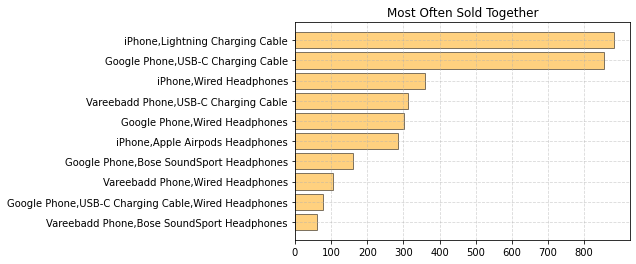

In [82]:
fig, ax = plt.subplots()
_ = ax.barh(sold_together_sort['Grouped'], sold_together_sort['Order ID'], color='orange', alpha=.5, edgecolor='black')
_ = ax.set_title('Most Often Sold Together')
_ = ax.set_xticks(np.arange(0,900,100))
_ = ax.grid(ls='--', alpha=.5)

#### ***What product sold the most? Why do you think it sold the most?***


In [118]:
product_group = all_data.groupby('Product')

In [119]:
product_sum = product_group[['Quantity Ordered', 'Sales']].sum()

In [121]:
product_sum['Price Each'] = product_group.mean()['Price Each']

In [128]:
product_sum = product_sum.sort_values(by='Quantity Ordered').reset_index()

In [130]:
product_sum

,Product,Quantity Ordered,Sales,Price Each
0,LG Dryer,646,387600.00,600.00
1,LG Washing Machine,666,399600.00,600.00
2,Vareebadd Phone,2068,827200.00,400.00
3,20in Monitor,4129,454148.71,109.99
4,ThinkPad Laptop,4130,4129958.70,999.99
5,Macbook Pro Laptop,4728,8037600.00,1700.00
6,Flatscreen TV,4819,1445700.00,300.00
7,Google Phone,5532,3319200.00,600.00
8,34in Ultrawide Monitor,6199,2355558.01,379.99
9,27in 4K Gaming Monitor,6244,2435097.56,389.99


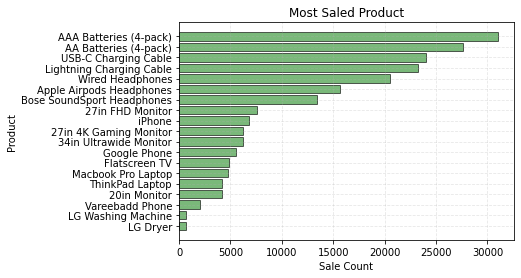

In [129]:
fig, ax = plt.subplots()
_ = ax.barh(product_sum['Product'], product_sum['Quantity Ordered'], color='forestgreen', alpha=.6, edgecolor='black')
_ = ax.set_title('Most Saled Product')
_ = ax.set_xlabel('Sale Count')
_ = ax.set_ylabel('Product')
_ = ax.grid(ls='--', alpha=.3)

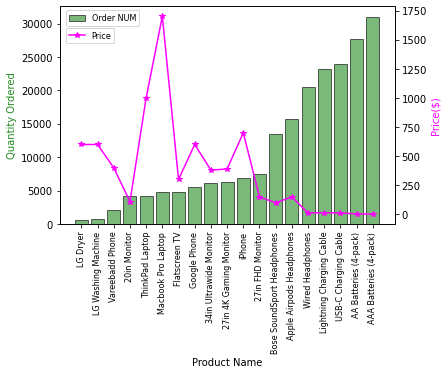

In [188]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
_ = ax.bar(product_sum['Product'], product_sum['Quantity Ordered'],color='forestgreen', alpha=.6, edgecolor='black', label='Order NUM')
_ = ax2.plot(product_sum['Price Each'], color='magenta', label='Price', marker='*')
_ = ax.set_xlabel('Product Name')
_ = ax.set_xticklabels(product_sum['Product'], rotation='vertical', size=8)
_ = ax.set_ylabel('Quantity Ordered', color='forestgreen')
#_ = ax.set_label('Order Num')
_ = ax.legend(bbox_to_anchor=(0.25, 1), fontsize=8)
_ = ax2.set_ylabel('Price($)', color='magenta')
_ = ax2.legend(bbox_to_anchor=(0.175,0.92), fontsize=8)